For project 8, we will plot proportional plots.

In [50]:
import pandas as pd
c=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
c.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Now as this a very big data we will focus on the dataset of united states. As a result we will filter out all other data

In [51]:
#Time series plot for USA
dat_USA = c[c['iso_code']=="USA"]
dat_USA.shape
dat_USA.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74951,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74952,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74953,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74954,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74955,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [67]:
dat_USA.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [52]:
#We will convert date to index for variations with time
dat_USA['date'] = pd.to_datetime(dat_USA['date'], utc=True)
dat_USA_index = dat_USA.set_index('date')
dat_USA_index.head()

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00+00:00,USA,North America,United States,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-23 00:00:00+00:00,USA,North America,United States,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-24 00:00:00+00:00,USA,North America,United States,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-25 00:00:00+00:00,USA,North America,United States,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-26 00:00:00+00:00,USA,North America,United States,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Text(0.5, 1.0, 'Pie Chart of Death Rate with various complications\n\n\n\n\n\n\n\n\n\n')

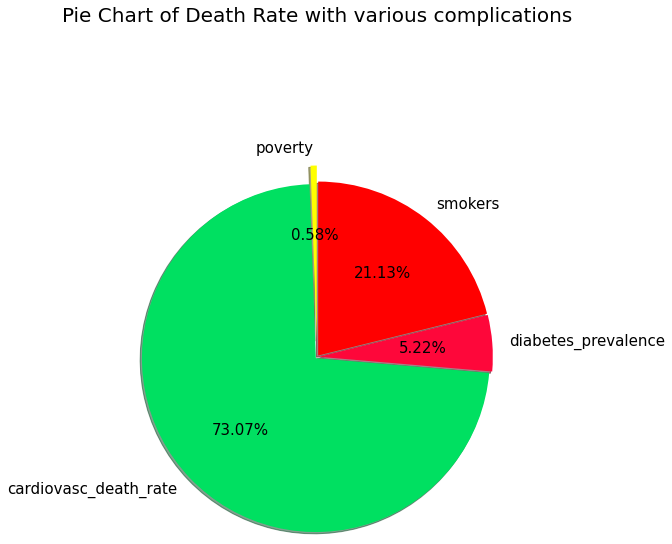

In [85]:
slices = [1.2, 151.089,10.79, 43.7]
activities = ['poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'smokers']
  
cols=['yellow','#00e061','#fe073a','red']
exp = [0.2,0.02,0.02, 0.02]
  
plt.pie(slices,labels=activities,
        textprops=dict(size=15,color='black'),
        radius=2,
        colors=cols,
        autopct='%2.2f%%',
        explode=exp,
        shadow=True,
        startangle=90)
  
plt.title('Pie Chart of Death Rate with various complications\n\n\n\n\n\n\n\n\n\n',color='black',size=20)

From the Pie chart we can see that patients with cardiovasc death rate is the highest, followed by smokers which indicates
that the more vulnerable lun gs is the more probability of being affected by Covid.

Now we will plot the distribution plot.

In [97]:
dat_USA_index['new_cases'].resample('A').sum()

date
2020-12-31 00:00:00+00:00    20099089.0
2021-12-31 00:00:00+00:00    10509276.0
Freq: A-DEC, Name: new_cases, dtype: float64

Text(0.5, 1.0, 'Pie Chart of total deaths during 2020 and 2021\n\n\n\n')

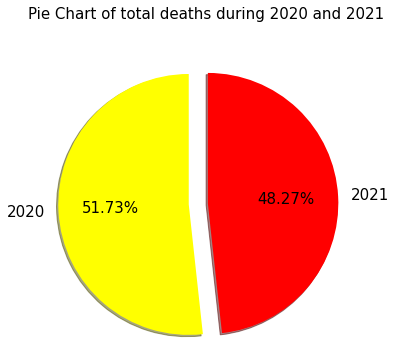

In [94]:
slices1 = [46921310,43784426 ]
activities1 = ['2020','2021']
  
cols=['yellow','red']
exp = [0.2,0.02]
  
plt.pie(slices1,labels=activities1,
        textprops=dict(size=15,color='black'),
        radius=1.5,
        colors=cols,
        autopct='%2.2f%%',
        explode=exp,
        shadow=True,
        startangle=90)
  
plt.title('Pie Chart of total deaths during 2020 and 2021\n\n\n\n',color='black',size=15)

Interestingly from the pie chart we can see that in 2021 there have been a huge amount of death just within four months,
obvious enough that 2020 total death cases is more. 

Text(0.5, 1.0, 'Pie Chart of new cases during 2020 and 2021\n\n\n\n')

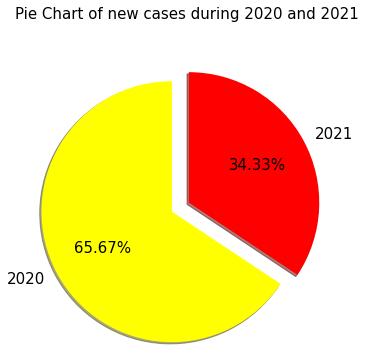

In [98]:
slices2 = [20099089,10509276.0 ]
activities2 = ['2020','2021']
  
cols=['yellow','red']
exp = [0.2,0.02]
  
plt.pie(slices2,labels=activities2,
        textprops=dict(size=15,color='black'),
        radius=1.5,
        colors=cols,
        autopct='%2.2f%%',
        explode=exp,
        shadow=True,
        startangle=90)
  
plt.title('Pie Chart of new cases during 2020 and 2021\n\n\n\n',color='black',size=15)

We can see that there were a lot many new cases during the 2020.